<h1 style="text-align: center;">[Your Project Title]</h1>
<h3 style="text-align: center;">[Your Name]</h3>

---

## **Section 1. Business Context**

**1.1 Context**

In an era of increasingly intense retail competition, a deep understanding of customer behavior and preferences has become key to supermarket business success. Supermarket X has collected comprehensive data on customer demographic characteristics, purchasing patterns, responses to promotional campaigns, and interactions through various sales channels (online and offline). This data covers various aspects ranging from customers' personal information to their transaction history over the past 2 years.

**1.2 Problem Statements**

1. Customer Segmentation and Value:
   - How do customer demographic characteristics (age, education, marital status, income) influence their total spending value?

2. Promotional Campaign Effectiveness:
   - What are the demographic characteristics and purchasing behaviors of customers who are most responsive to promotional campaigns?

3. Product Purchase Patterns and Channel Preference:
   - How is customer spending distributed across each product category (wine, fruits, meat, fish, sweets, gold products) based on customer segments?

**1.3 Key Objective**

## **Section 2. Data Understanding**

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

**2.1 General Information**

In [175]:
df=pd.read_csv(r'D:\Purwadhika\Module 2. Data Analysis\Capstone\supermarket_analysis\data\raw\Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [176]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

**2.2 Feature Information**

Berikut adalah penjelasan data:  

**People**  
● ID: Identifikasi unik pelanggan  
● Year_Birth: Tahun kelahiran pelanggan  
● Education: Tingkat pendidikan pelanggan  
● Marital_Status: Status pernikahan pelanggan  
● Income: Pendapatan tahunan rumah tangga pelanggan  
● Kidhome: Jumlah anak di rumah pelanggan  
● Teenhome: Jumlah remaja di rumah pelanggan  
● Dt_Customer: Tanggal pelanggan mulai bergabung dengan perusahaan  
● Recency: Jumlah hari sejak pembelian terakhir pelanggan  
● Complain: 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak  

**Products**  
● MntWines: Jumlah uang yang dihabiskan untuk anggur dalam 2 tahun terakhir  
● MntFruits: Jumlah uang yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir  
● MntMeatProducts: Jumlah uang yang dihabiskan untuk produk daging dalam 2 tahun terakhir  
● MntFishProducts: Jumlah uang yang dihabiskan untuk produk ikan dalam 2 tahun terakhir  
● MntSweetProducts: Jumlah uang yang dihabiskan untuk produk manis dalam 2 tahun terakhir  
● MntGoldProds: Jumlah uang yang dihabiskan untuk emas dalam 2 tahun terakhir  

**Promotion**  
● NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon  
● AcceptedCmp1: 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak  
● AcceptedCmp2: 1 jika pelanggan menerima penawaran pada kampanye kedua, 0 jika tidak  
● AcceptedCmp3: 1 jika pelanggan menerima penawaran pada kampanye ketiga, 0 jika tidak  
● AcceptedCmp4: 1 jika pelanggan menerima penawaran pada kampanye keempat, 0 jika tidak  
● AcceptedCmp5: 1 jika pelanggan menerima penawaran pada kampanye kelima, 0 jika tidak  
● Response: 1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika tidak  

**Place**  
● NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan  
● NumCatalogPurchases: Jumlah pembelian yang dilakukan melalui katalog  
● NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko  
● NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir  

In [177]:
# Menambah Kolom Data 'umur'
current_year = 2014
df['Age'] = current_year - df['Year_Birth']

# Menambah Kolom Data 'total pengeluaran'
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


**2.3 Statistics Summary**

In [178]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spending
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,45.194196,605.798214
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,602.249288
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000,5.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,396.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,121.000000,2525.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [179]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
Age                    0.000000
Total_Spending         0.000000
dtype: f

<Axes: >

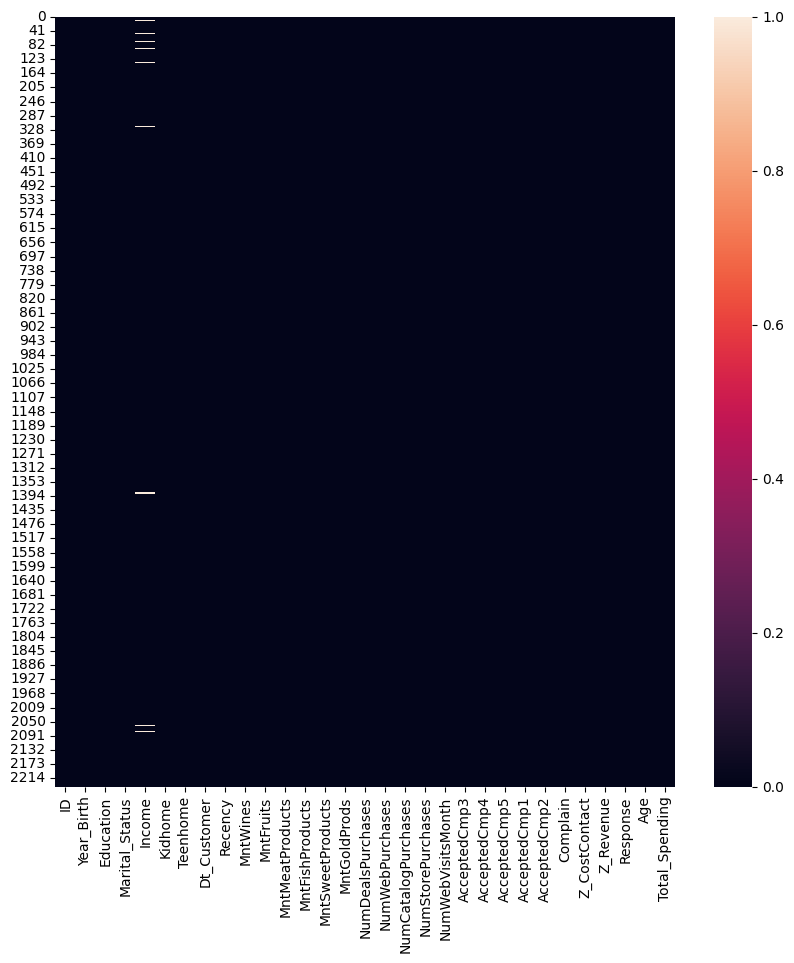

In [180]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [181]:
df = df.dropna()
df.shape

(2216, 31)

**3.2 Duplicated Values**

In [182]:
duplicates = df.duplicated()
print(f"Jumlah baris duplikat: {duplicates.sum()}")

Jumlah baris duplikat: 0


**3.3 Incorrect Data Types**

In [183]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
Total_Spending           int64
dtype: object

In [184]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year
print(df['Dt_Customer_Year'])

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer_Year, Length: 2216, dtype: int32


**3.4 Inconsistent Values**

In [185]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [186]:
df.Education.replace({"Graduation": "UnderGraduate",
                      "Basic": "High School",
                      "2n Cycle":"Master"},
                      inplace=True)

df.Education.unique()

array(['UnderGraduate', 'PhD', 'Master', 'High School'], dtype=object)

In [187]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [188]:
df.Marital_Status.replace({"Together": "In Relationship",
                           "Married": "In Relationship",
                           "Divorced":"Single",
                           "Widow": "Single",
                           "Alone": "Single",
                           "Absurd": "Single",
                           "YOLO": "Single"},
                           inplace=True)

df.Marital_Status.unique()

array(['Single', 'In Relationship'], dtype=object)

**3.5 Outlier Removal**

<Axes: xlabel='Age', ylabel='Count'>

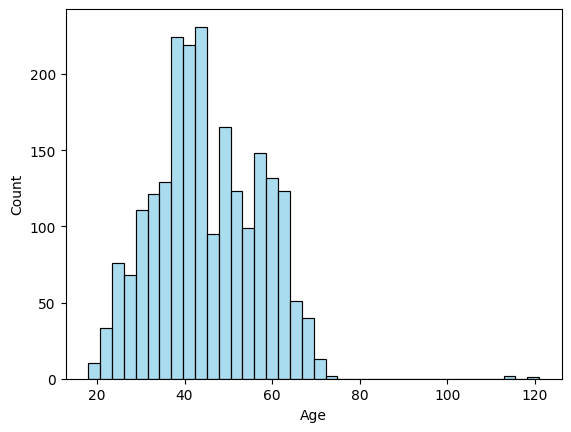

In [189]:
sns.histplot(data=df, 
            x='Age',
            color='skyblue',
            edgecolor='black',
            alpha=0.7)

<Axes: xlabel='Income', ylabel='Count'>

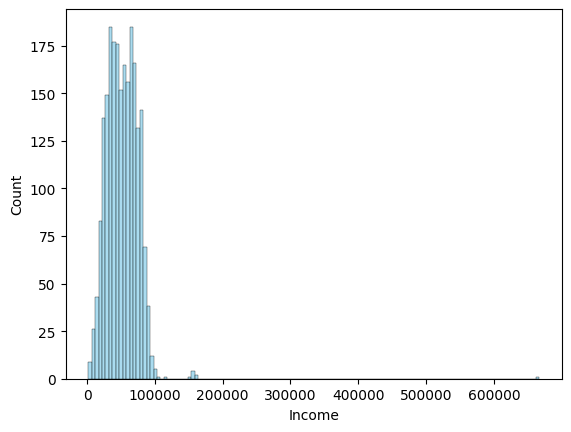

In [190]:
sns.histplot(data=df, 
            x='Income',
            color='skyblue',
            edgecolor='black',
            alpha=0.7)

In [191]:
df = df.loc[df.Year_Birth  >= 1935]
df = df.loc[df.Income  <= 200000]

df.shape

(2212, 32)

## **Section 4. Analytics**

### **4.1 Question 1**

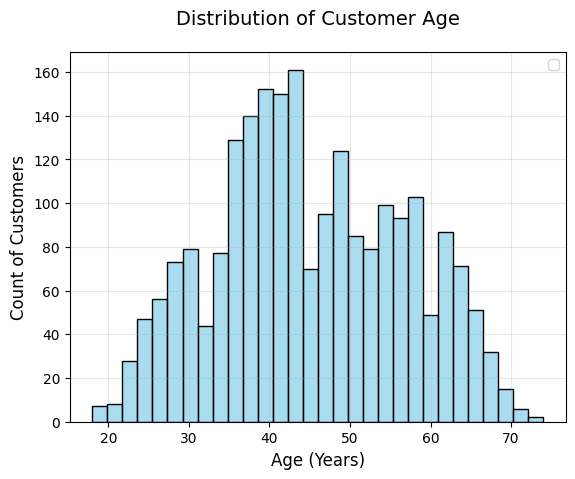

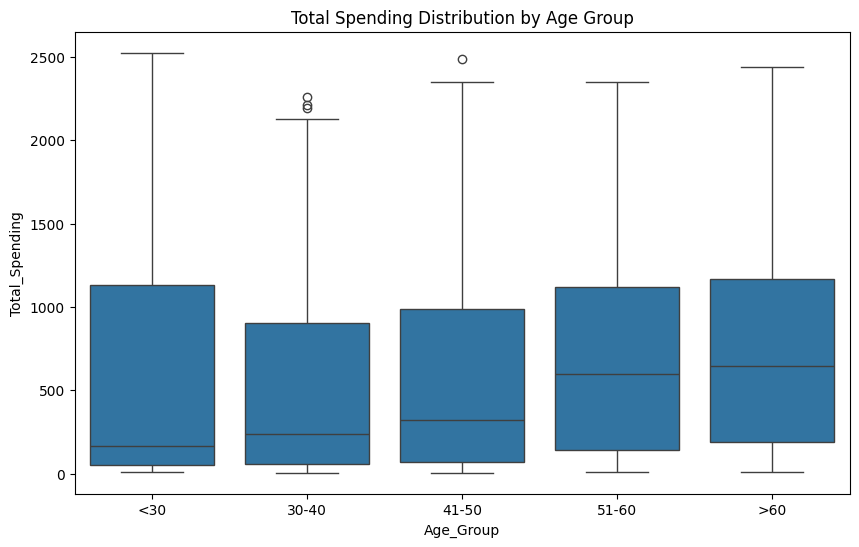

In [192]:
# Histogram Distrbusi Usia
sns.histplot(data=df, 
            x='Age',
            bins=30,  # You can adjust number of bins
            color='skyblue',
            edgecolor='black',
            alpha=0.7)

plt.title('Distribution of Customer Age', pad=20, fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Box plot berdasarkan Age Groups
df['Age_Group'] = pd.cut(df['Age'], 
                        bins=[0, 30, 40, 50, 60, 100],
                        labels=['<30', '30-40', '41-50', '51-60', '>60'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Total_Spending')
plt.title('Total Spending Distribution by Age Group')
plt.show()

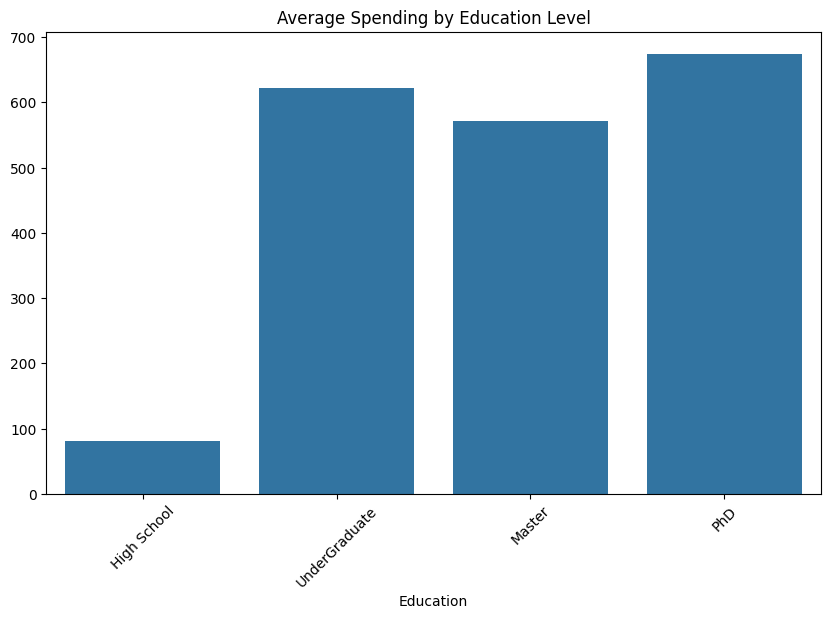

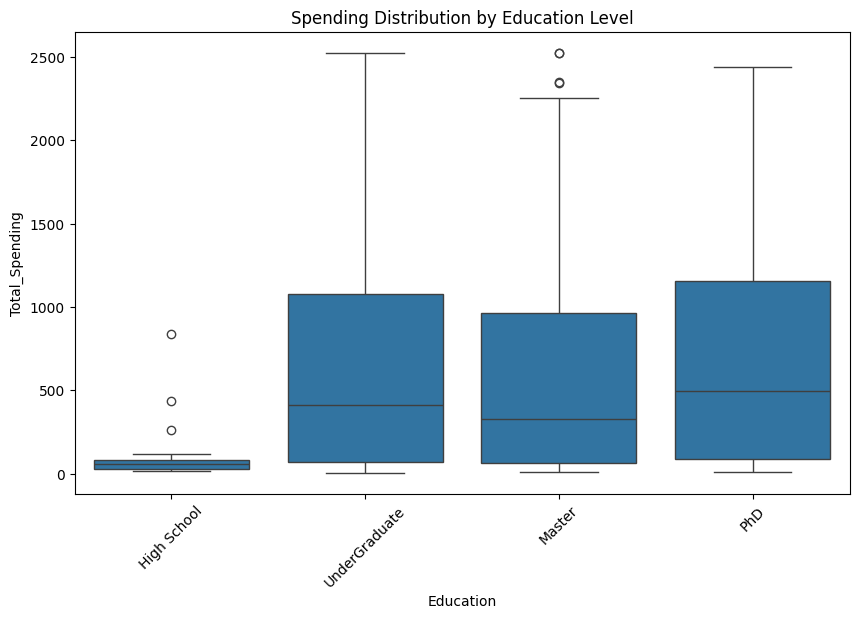

In [208]:
# Bar plot rata-rata spending berdasarkan pendidikan
plt.figure(figsize=(10, 6))
education_order = ['High School', 'UnderGraduate', 'Master', 'PhD']
df['Education'] = pd.Categorical(df['Education'], categories=education_order, ordered=True)
education_spending = df.groupby('Education')['Total_Spending'].mean()
sns.barplot(x=education_spending.index, y=education_spending.values)
plt.title('Average Spending by Education Level')
plt.xticks(rotation=45)
plt.show()

# Box plot untuk melihat distribusi
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='Total_Spending')
plt.title('Spending Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

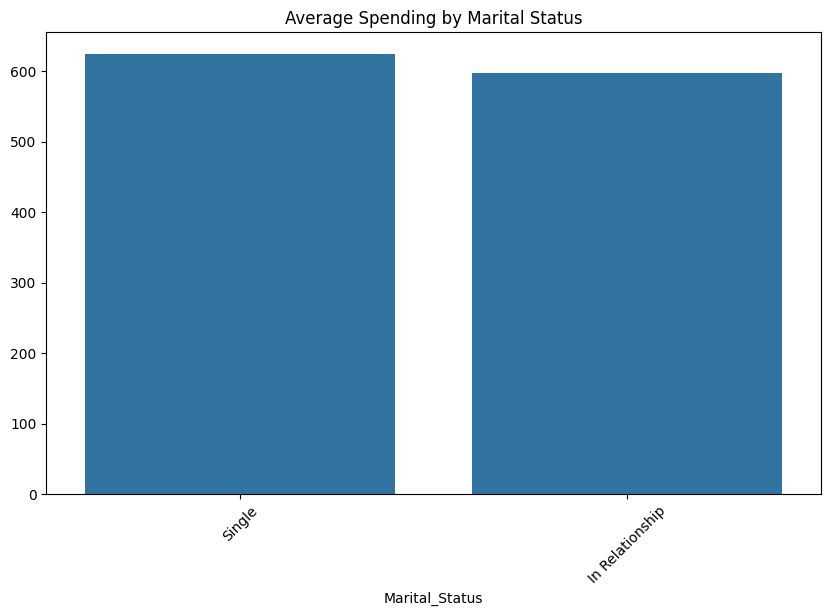

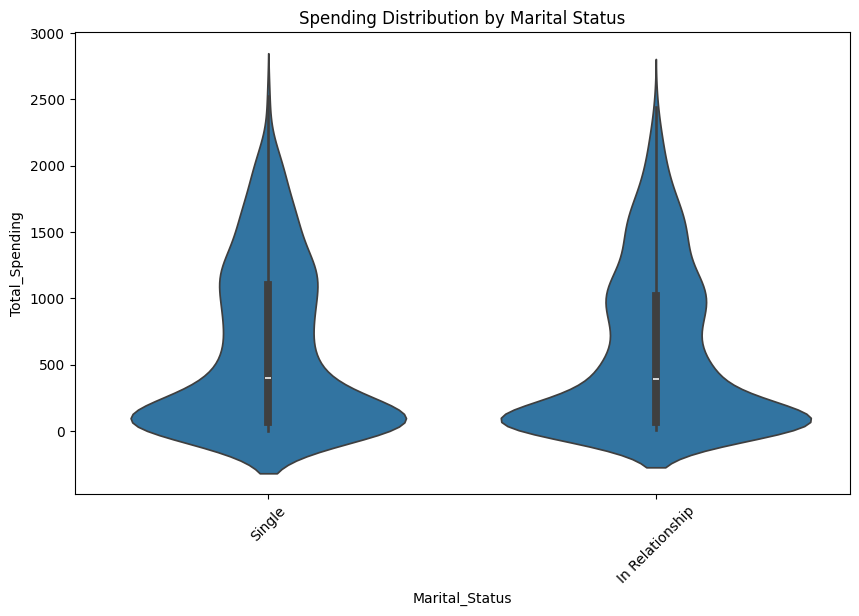

In [194]:
# Bar plot rata-rata spending berdasarkan status perkawinan
plt.figure(figsize=(10, 6))
marital_spending = df.groupby('Marital_Status')['Total_Spending'].mean().sort_values(ascending=False)
sns.barplot(x=marital_spending.index, y=marital_spending.values)
plt.title('Average Spending by Marital Status')
plt.xticks(rotation=45)
plt.show()

# Violin plot untuk melihat distribusi
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Marital_Status', y='Total_Spending')
plt.title('Spending Distribution by Marital Status')
plt.xticks(rotation=45)
plt.show()

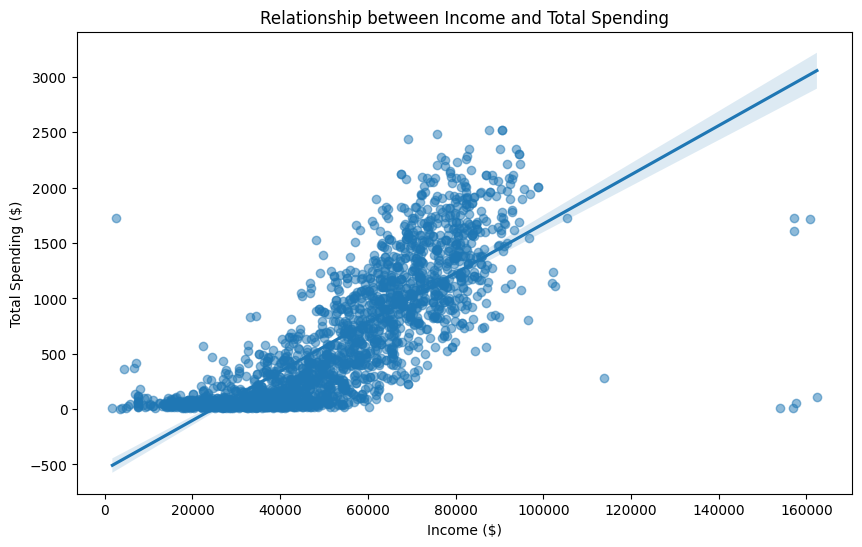

In [195]:
# Scatter plot Pendapatan vs Total Spending
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Income', y='Total_Spending', scatter_kws={'alpha':0.5})
plt.title('Relationship between Income and Total Spending')
plt.xlabel('Income ($)')
plt.ylabel('Total Spending ($)')
plt.show()

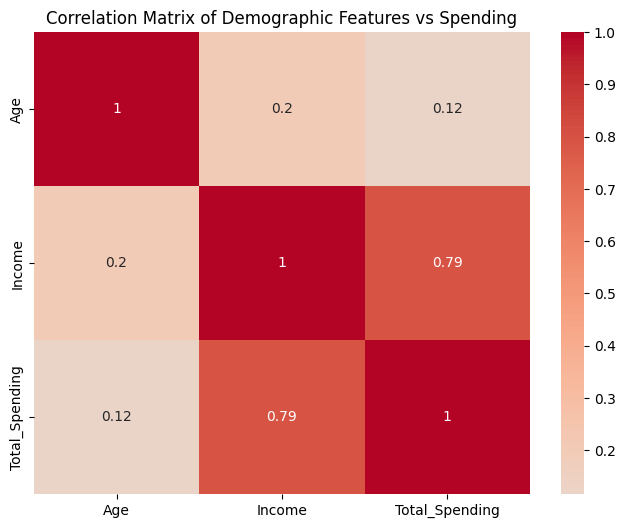

In [196]:
# Correlation analysis
numeric_cols = ['Age', 'Income', 'Total_Spending']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Demographic Features vs Spending')
plt.show()

In [197]:
# ANOVA test for categorical variables
from scipy import stats

# Age
age_groups = [group['Total_Spending'] for name, group in df.groupby('Age_Group')]
f_stat, p_value = stats.f_oneway(*age_groups)
print(f"ANOVA test for Age_Group: p-value = {p_value:.4f}")

# Education
education_groups = [group for name, group in df.groupby('Education')['Total_Spending']]
f_stat, p_value = stats.f_oneway(*education_groups)
print(f"ANOVA test for Education: p-value = {p_value:.4f}")

# Marital Status
marital_groups = [group for name, group in df.groupby('Marital_Status')['Total_Spending']]
f_stat, p_value = stats.f_oneway(*marital_groups)
print(f"ANOVA test for Marital Status: p-value = {p_value:.4f}")

# Correlation test for numerical variables
correlation_income = stats.pearsonr(df['Income'], df['Total_Spending'])
print(f"Correlation test for Income: r = {correlation_income[0]:.4f}, p-value = {correlation_income[1]:.4f}")

correlation_age = stats.pearsonr(df['Age'], df['Total_Spending'])
print(f"Correlation test for Age: r = {correlation_age[0]:.4f}, p-value = {correlation_age[1]:.4f}")

ANOVA test for Age_Group: p-value = 0.0000
ANOVA test for Education: p-value = 0.0000
ANOVA test for Marital Status: p-value = 0.3252
Correlation test for Income: r = 0.7927, p-value = 0.0000
Correlation test for Age: r = 0.1159, p-value = 0.0000


In [210]:
# Summary statistics by demographic groups
demographic_summary = pd.DataFrame({
    'Mean_Spending': df.groupby('Age_Group')['Total_Spending'].mean(),
    'Median_Spending': df.groupby('Age_Group')['Total_Spending'].median(),
    'Std_Spending': df.groupby('Age_Group')['Total_Spending'].std()
})

print("\nSpending Summary by Age:")
print(demographic_summary)


Spending Summary by Age:
           Mean_Spending  Median_Spending  Std_Spending
Age_Group                                              
<30           572.747082            165.0    676.451762
30-40         521.773585            237.0    582.263249
41-50         576.101404            322.0    589.925888
51-60         696.646681            599.0    577.806777
>60           747.242424            647.0    603.487698


In [211]:
# Summary statistics by demographic groups
demographic_summary = pd.DataFrame({
    'Mean_Spending': df.groupby('Education')['Total_Spending'].mean(),
    'Median_Spending': df.groupby('Education')['Total_Spending'].median(),
    'Std_Spending': df.groupby('Education')['Total_Spending'].std()
})

print("\nSpending Summary by Education:")
print(demographic_summary)


Spending Summary by Education:
               Mean_Spending  Median_Spending  Std_Spending
Education                                                  
High School        81.796296             57.0    123.227260
UnderGraduate     622.188341            415.0    600.187588
Master            570.984014            326.0    597.862915
PhD               674.283333            494.0    615.746507


### **4.2 Question 2**

In [199]:
# Define product columns
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total spending per customer
df['Total_Spending'] = df[product_cols].sum(axis=1)

# Create spending segments
df['Spending_Segment'] = pd.qcut(df['Total_Spending'], 
                                q=3, 
                                labels=['Low Spender', 'Medium Spender', 'High Spender'])

# Calculate percentage of spending in each category
for col in product_cols:
    df[f'{col}_Pct'] = df[col] / df['Total_Spending'] * 100

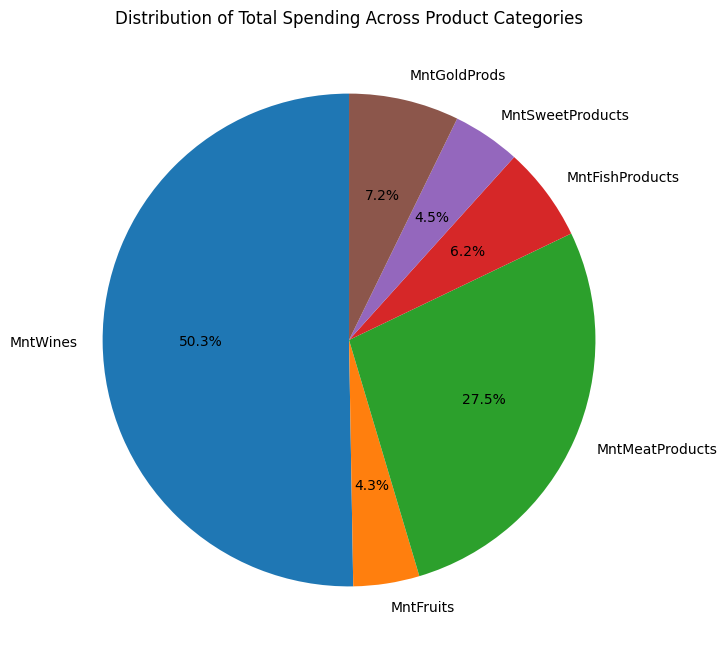

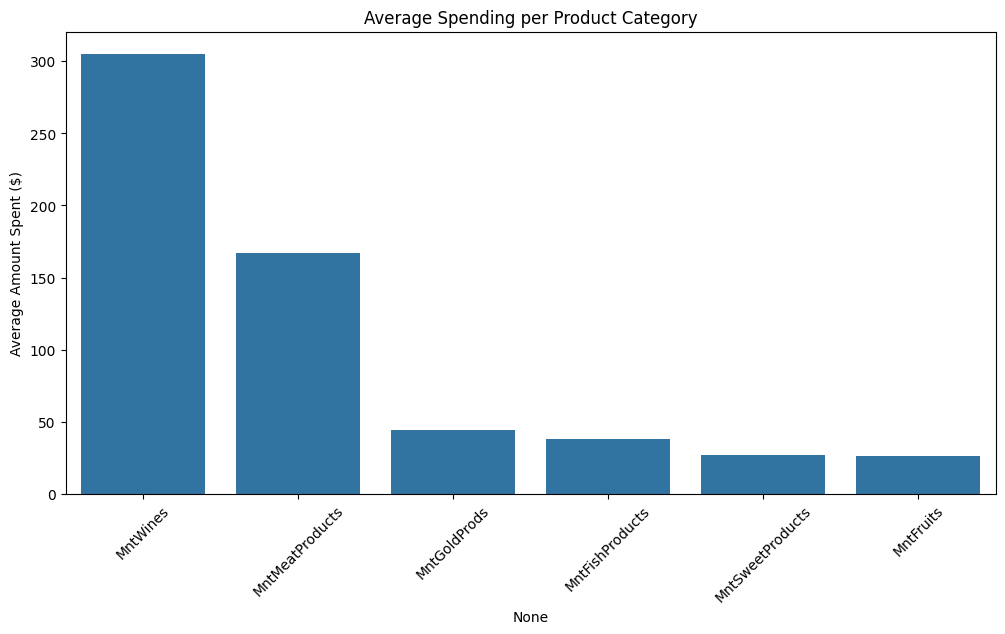

In [200]:
# Pie chart untuk distribusi total spending per kategori
plt.figure(figsize=(10, 8))
total_spending = df[product_cols].sum()
plt.pie(total_spending, 
        labels=product_cols, 
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Total Spending Across Product Categories')
plt.show()

# Bar plot untuk rata-rata spending per kategori
plt.figure(figsize=(12, 6))
avg_spending = df[product_cols].mean().sort_values(ascending=False)
sns.barplot(x=avg_spending.index, y=avg_spending.values)
plt.title('Average Spending per Product Category')
plt.xticks(rotation=45)
plt.ylabel('Average Amount Spent ($)')
plt.show()

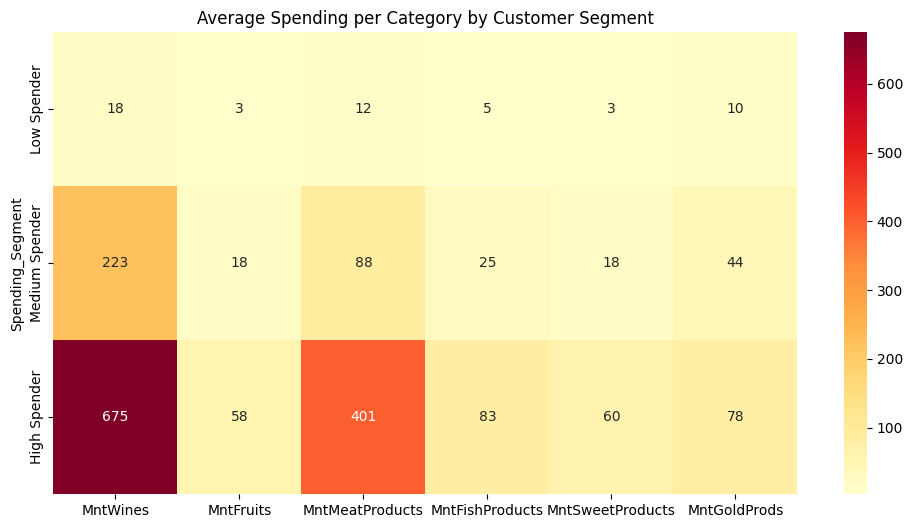

<Figure size 1200x600 with 0 Axes>

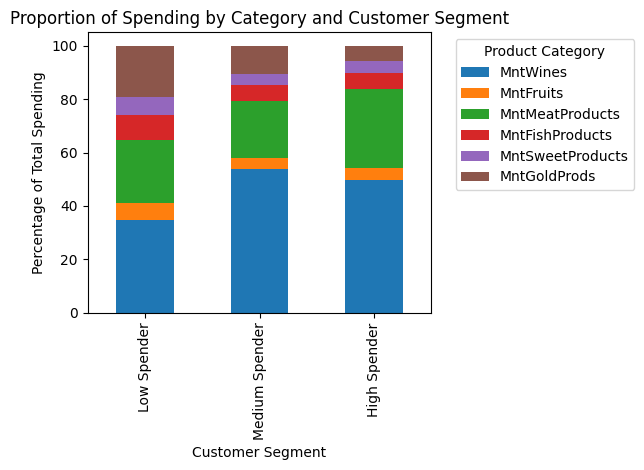

In [201]:
# Heatmap untuk rata-rata spending per segment
plt.figure(figsize=(12, 6))
segment_spending = df.groupby('Spending_Segment')[product_cols].mean()
sns.heatmap(segment_spending, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Spending per Category by Customer Segment')
plt.show()

# Stacked bar chart untuk proporsi spending
segment_spending_pct = df.groupby('Spending_Segment')[product_cols].sum()
segment_spending_pct = segment_spending_pct.div(segment_spending_pct.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
segment_spending_pct.plot(kind='bar', stacked=True)
plt.title('Proportion of Spending by Category and Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage of Total Spending')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

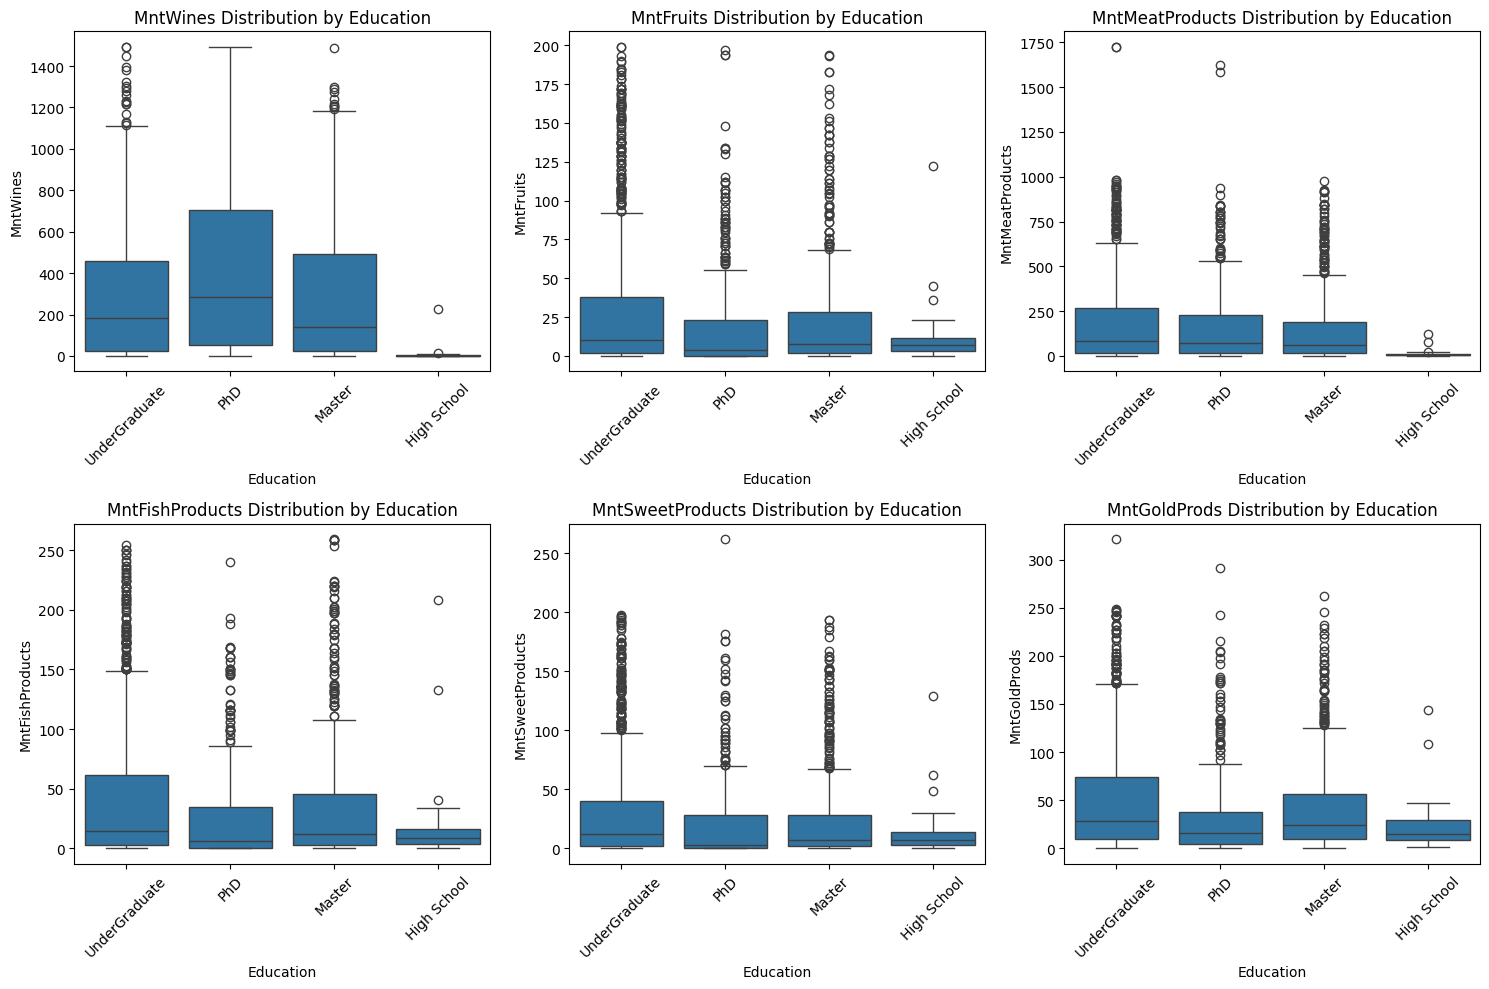

In [202]:
# Box plots untuk setiap kategori produk berdasarkan education
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(product_cols):
    sns.boxplot(data=df, x='Education', y=col, ax=axes[idx])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
    axes[idx].set_title(f'{col} Distribution by Education')

plt.tight_layout()
plt.show()

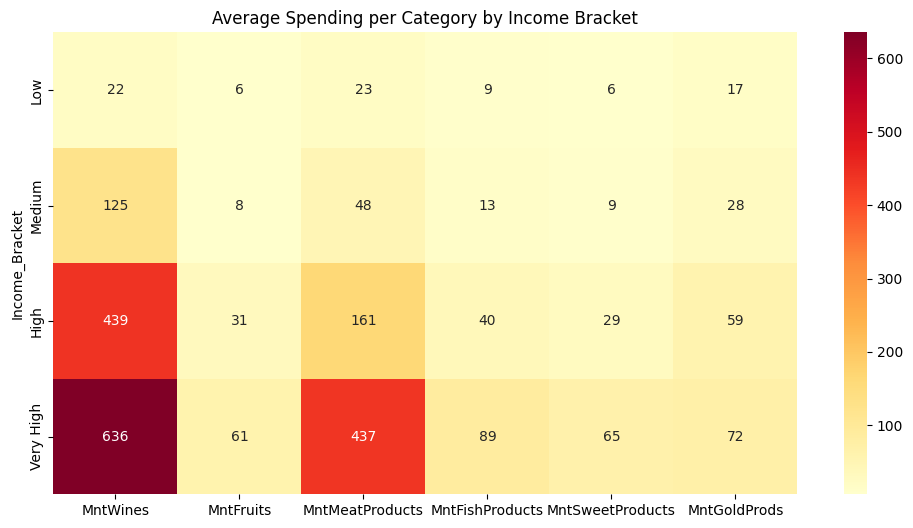

In [203]:
# Create income brackets
df['Income_Bracket'] = pd.qcut(df['Income'], q=4, 
                              labels=['Low', 'Medium', 'High', 'Very High'])

# Heatmap untuk spending pattern berdasarkan income
plt.figure(figsize=(12, 6))
income_spending = df.groupby('Income_Bracket')[product_cols].mean()
sns.heatmap(income_spending, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Spending per Category by Income Bracket')
plt.show()

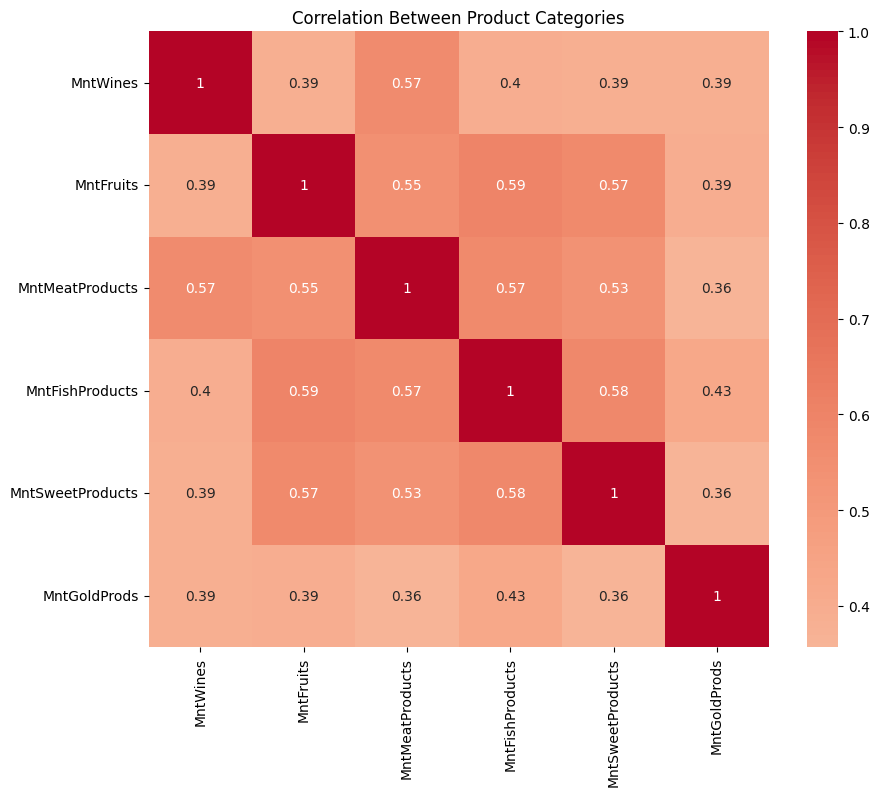

In [204]:
# Correlation matrix antara kategori produk
plt.figure(figsize=(10, 8))
correlation_matrix = df[product_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Product Categories')
plt.show()

In [205]:
# Summary statistics per product category
summary_stats = pd.DataFrame({
    'Mean': df[product_cols].mean(),
    'Median': df[product_cols].median(),
    'Std': df[product_cols].std(),
    'Min': df[product_cols].min(),
    'Max': df[product_cols].max()
})
print("\nSummary Statistics per Product Category:")
print(summary_stats)

# ANOVA test for spending differences across segments
from scipy import stats

for col in product_cols:
    segment_groups = [group for name, group in df.groupby('Spending_Segment')[col]]
    f_stat, p_value = stats.f_oneway(*segment_groups)
    print(f"\nANOVA test for {col}: p-value = {p_value:.4f}")


Summary Statistics per Product Category:
                        Mean  Median         Std  Min   Max
MntWines          305.287523   175.5  337.322940    0  1493
MntFruits          26.329566     8.0   39.744052    0   199
MntMeatProducts   167.029837    68.0  224.254493    0  1725
MntFishProducts    37.648734    12.0   54.772033    0   259
MntSweetProducts   27.046564     8.0   41.090991    0   262
MntGoldProds       43.925859    24.5   51.706981    0   321

ANOVA test for MntWines: p-value = 0.0000

ANOVA test for MntFruits: p-value = 0.0000

ANOVA test for MntMeatProducts: p-value = 0.0000

ANOVA test for MntFishProducts: p-value = 0.0000

ANOVA test for MntSweetProducts: p-value = 0.0000

ANOVA test for MntGoldProds: p-value = 0.0000


In [206]:
# Profile of top spenders in each category
top_spenders_profile = pd.DataFrame()

for col in product_cols:
    # Get top 10% spenders in each category
    threshold = df[col].quantile(0.9)
    top_spenders = df[df[col] > threshold]
    
    profile = {
        'Avg_Age': top_spenders['Age'].mean(),
        'Avg_Income': top_spenders['Income'].mean(),
        'Most_Common_Education': top_spenders['Education'].mode()[0],
        'Most_Common_Marital': top_spenders['Marital_Status'].mode()[0]
    }
    
    top_spenders_profile[col] = pd.Series(profile)

print("\nProfile of Top Spenders by Category:")
print(top_spenders_profile)


Profile of Top Spenders by Category:
                              MntWines        MntFruits  MntMeatProducts  \
Avg_Age                      47.488688         44.13964        44.723982   
Avg_Income                74992.339367     73305.342342     79998.895928   
Most_Common_Education              PhD    UnderGraduate    UnderGraduate   
Most_Common_Marital    In Relationship  In Relationship  In Relationship   

                       MntFishProducts MntSweetProducts     MntGoldProds  
Avg_Age                      46.162162        45.100917        46.633484  
Avg_Income                73325.900901     74834.990826     66981.665158  
Most_Common_Education    UnderGraduate    UnderGraduate    UnderGraduate  
Most_Common_Marital    In Relationship  In Relationship  In Relationship  


## **Section 5. Conclusion and Recommendation**

**5.1 Conclusion**

**5.2 Recommendation**